In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 유용한 파이썬의 패키지 및 모듈 소개

## OS 모듈

In [2]:
import os
os.getcwd() # 현재 경로 구하기
os.listdir() # 현재 폴더의 모든 파일 리스트업
os.listdir('..') # 상위 폴더의 모든 파일 리스트업
# os.mkdir('figure') : 폴더명 figure 폴더 만들기 
# os.chdir('C:/') : 워킹 디렉토리 변경

'C:\\Users\\yuniv\\PycharmProjects\\untitled\\fira-pythonbasic'

['.ipynb_checkpoints',
 'arr.npy',
 'beatles.txt',
 'data',
 'data.csv',
 'day1',
 'day10',
 'day11',
 'day12',
 'day13',
 'day14',
 'day15',
 'day2',
 'day3',
 'day4',
 'day5',
 'day6',
 'day7',
 'day8',
 'day9',
 'fig1.png',
 'fig2.png',
 'fig3.png',
 'fig4.png',
 'figure',
 'Iris.csv',
 'lab 0726.py',
 'ml-1m',
 'movies.dat',
 'multiple_arr.npz',
 'python_0724.ipynb',
 'ratings.dat',
 'Untitled.ipynb',
 'users.dat',
 'Wage.csv']

['.idea',
 'baekjoon',
 'fira-pythonbasic',
 'growth-hackers',
 'neuralnetwork',
 'venv']

## glob 모듈

In [3]:
# glob : 특정 폴더 내 파일 이름을 불러올 때 사용
# 특히 특정 패턴이 반복되는 파일들을 불러와야 하는 경우에 유용하게 사용
import glob
glob.glob('ml-1m/*.dat') # ml-1m 폴더에 포함된 .dat 파일명을 리스트로 출력
glob.glob('ml-1m/*.*') # ml-1m 폴더에 포함된 모든 유형의 파일명을 리스트로 출력

[]

[]

## pandas를 이용한 탐색적 자료분석

### 데이터 불러오기 & 병합하기

In [4]:
# 패키지 불러오기
import pandas as pd
import numpy as np

# 데이터 컬럼명 리스트 생성
unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] 
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

# 데이터 불러오기
users = pd.read_csv('users.dat', sep='::', header=None, names=unames, engine='python')
ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=rnames, engine='python')
movies = pd.read_csv('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [5]:
# 데이터 구조 파악
users.head()
users.shape

ratings.head()
ratings.shape

movies.head()
movies.shape

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


(6040, 5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


(1000209, 4)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


(3883, 3)

In [6]:
# 자료의 병합
# 병합하려는 두 테이블에서 중복되는 컬럼명을 키로 사용ㅡ, pd.merge로 병합한다
merge_data = pd.merge(ratings, users) # 공통 컬럼 user_id
merge_data.head()
merge_data.shape

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


(1000209, 8)

In [7]:
data = pd.merge(merge_data, movies) # 서로 다른 파일에 공통 컬럼이 있으면 합체 가능, 이 경우 movie_id
data.head()
# by='', 중복된 열이 있다면 by 옵션으로 기준을 정해서 합치는 기준 열 정할 수 있다.

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### 데이터 탐색하기

In [21]:
# 성별로 영화별 평균 평점 계산
# pivot table 생성, 데이터 프레임
mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]
mean_ratings.size # 7412행
# 어떤 컬럼을 합칠 것인지, 어떤 컬럼 별로 그룹이 될 것인지, 변수 추가 시 어떻게 볼 것인지 고려

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


7412

In [10]:
# title을 기준으로 세기 -> 평가를 가장 많이 받은 영화
counts = data['title'].value_counts() # value_counts()는 개수 세는 메소드
# counts의 type은 series
counts.head() # 자동 sorting
counts.index # index는 곧 title

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: title, dtype: int64

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Love Walked In (1998)', 'Sleepover (1995)',
       'Last of the High Kings, The (a.k.a. Summer Fling) (1996)',
       'Dream Man (1995)', 'Harlem (1993)', 'One Man's Hero (1999)',
       'Frank and Ollie (1995)', 'Roula (1995)', 'McCullochs, The (1975)',
       'Target (1995)'],
      dtype='object', length=3706)

pandas.core.series.Series

In [12]:
# 250번 이상 평가 받은 영화명을 sel_titles로 저장
sel_titles = counts.index[counts > 250]
sel_titles[:10]

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)'],
      dtype='object')

In [22]:
# 영화별로 사용자가 평점을 매긴 횟수가 250건 이상인 영화에 대해 분석 진행
mean_ratings = pd.pivot_table(data, values = 'rating', index = 'title',  columns = 'gender', aggfunc = np.mean)
mean_ratings.head()
mean_ratings = mean_ratings.loc[sel_titles] # mean_ratings 중 sel_titles 해당하는 것만 subset
mean_ratings.head()
mean_ratings.size # 2428행

# 남자들의 영화 평점 순으로 정렬
sorted_ratings_by_M = mean_ratings.sort_values(by = 'M', ascending = False) # 기준 'M'의 value, 내림차순 
sorted_ratings_by_M.head()

# 여자들의 영화 평점 순으로 정렬
sorted_ratings_by_F = mean_ratings.sort_values(by = 'F', ascending = False) # 기준 'F'의 value, 내림차순
sorted_ratings_by_F.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197


2428

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248


gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [10]:
# 영화별 평점에 대한 요약 통계량
import numpy as np
table = pd.pivot_table(data, values='rating', index='title', aggfunc=[len, np.sum, np.mean], fill_value=0)
# len은 평가된 횟수, sum은 평점들의 합, fill_value=0은 비어 있는 곳 0으로 채워라 
table.head()

,len,sum,mean
,rating,rating,rating
title,,,
"$1,000,000 Duck (1971)",37,112,3.027027
'Night Mother (1986),70,236,3.371429
'Til There Was You (1997),52,140,2.692308
"'burbs, The (1989)",303,882,2.910891
...And Justice for All (1979),199,739,3.713568


In [11]:
# csv 파일로 저장
data.to_csv('data.csv')

In [14]:
# 성별 평점 차이 구하기
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F'] # diff라는 새로운 열 생성
sorted_by_diff = mean_ratings.sort_values(by='diff', ascending=False) # 내림차순
sorted_by_diff.head(7)

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff', ascending=True) # 오름차순
sorted_by_diff.head(7)

gender,F,M,diff
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167


gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885


In [27]:
# 사용자들의 호불호가 확실히 나뉘는 영화를 알아보자
# 호불호가 확실히 나뉜다 = 표준편차(분산)가 크다
# title 기준으로 ratings의 std를 rating_std_by_title에 저장 
rating_std_by_title = data.groupby('title')['rating'].std()

# 250건 이상 평가 받은 영화들의 리스트 sel_titles와 매칭
rating_std_by_title = rating_std_by_title.loc[sel_titles]
rating_std_by_title.sort_values(ascending=False).head(10)
rating_std_by_title.size # 1214개

Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

1214

#### pandas의 groupby 메소드
- 데이터를 그룹 별로 분류하는 역할
- 인수로 "열 또는 열의 리스트", "행 인덱스" 등 사용
- 연산 결과로 그룹 데이터를 나타내는 GroupBy 클래스 객체를 반환
- 위 객체에는 그룹별로 연산을 할 수 있는 그룹 연산 메서드가 있음
- 참고 : https://datascienceschool.net/view-notebook/76dcd63bba2c4959af15bec41b197e7c/

#### pandas의 iloc과 loc 메소드
- iloc : integer positon를 통해 값을 찾을 수 있다. label로는 찾을 수 없다
- loc : label 을 통해 값을 찾을 수 있다. integer position로는 찾을 수 없다.

#### 실습: 사용자별로 영화에 대한 평점을 계산한 뒤 아래 항목을 확인하기
- 사용자마다 평가한 영화의 수에 대한 기초통계량
- 사용자마다 평가한 영화의 수가 500이상인 사용자들에 대해 아래를 진행
- 남자 사용자들의 평균 평점과 여자 사용자들의 평균 평점 비교
- 평균적으로 높은 평점을 부여하는 사용자 확인
- 평균적으로 낮은 평점을 부여하는 사용자 확인
- 영화마다 다양한 평점을 부여하는 사용자 확인

## numpy 실습

In [36]:
# Numpy 불러오기
import numpy as np

# 그리드 생성
points = np.arange(-5, 5, 0.01) # 시작점 - 끝점 - 간격: 등차수열
xs, ys = np.meshgrid(points, points) # meshgrid -> points: x축 + y축을 격자(points)로 표현하고 싶을 때 사용
print(xs.shape) # 하나 하나 대응돼서 점을 나타냄. 1000 x 1000: 다 필요함. 공간통계(2D/3D...)에서 좌표 설정 시에 활용됨. 
print(ys.shape)
xs
ys

(1000, 1000)
(1000, 1000)


array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [34]:
z = np.sqrt(xs**2 + ys**2) # xs와 ys의 연산을 통해 z라는 array 생성
print(z.shape)
z

(1000, 1000)


array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5,1,'z')

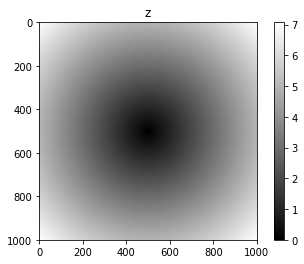

In [38]:
import matplotlib.pyplot as plt 

# 생성한 배열 z를 gray-scale로 표현하겠다
plt.imshow(z, cmap = plt.cm.gray) 

# gray-scale은 값이 작으면 검은색, 크면 흰색
# R 팔레트처럼 여러 종류 존재 (i.e. 색상도 다양) 
plt.colorbar() # 오른쪽에 표현된 색상 scale
plt.title('z')
plt.show()

In [40]:
# 조건절 표현 : 참일 때 x, 거짓일 때 y
x = np.array([1, 2, 3, 4, 5])
y = x+1
cond = np.array([True, False, True, True, False]) # 조건 설정
res = np.where(cond, x, y) # R의 ifelse 같은 명령어
res

array([1, 3, 3, 4, 6])

In [42]:
np.random.seed(1)
arr = np.random.randn(5,5) # 정규 분포 난수 생성하여 5행 5열 만들어라
arr
res2 = np.where(arr > 0, 2, -2) # 조건 양수, 양수면 2, 음수면 -2
res2
res3 = np.where(arr > 0, 2, arr) # 조건 양수, 양수면 2, 음수면 자기 자신
res3

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
       [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595]])

array([[ 2, -2, -2, -2,  2],
       [-2,  2, -2,  2, -2],
       [ 2, -2, -2, -2,  2],
       [-2, -2, -2,  2,  2],
       [-2,  2,  2,  2,  2]])

array([[ 2.        , -0.61175641, -0.52817175, -1.07296862,  2.        ],
       [-2.3015387 ,  2.        , -0.7612069 ,  2.        , -0.24937038],
       [ 2.        , -2.06014071, -0.3224172 , -0.38405435,  2.        ],
       [-1.09989127, -0.17242821, -0.87785842,  2.        ,  2.        ],
       [-1.10061918,  2.        ,  2.        ,  2.        ,  2.        ]])

In [44]:
# np.where 위치를 찾아내는 기준으로 쓰임
np.where(arr>0) # 어느 위치에 있다: 0,0 ... 행렬일 때는 헷갈리고 하나의 벡터인 경우 널리 활용될 수 있음

(array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4], dtype=int64),
 array([0, 4, 1, 3, 0, 4, 3, 4, 1, 2, 3, 4], dtype=int64))

In [48]:
# 정렬/위치 찾기 - 벡터화 하면 용이
arr = arr.reshape(-1) # 벡터화
arr.shape # arr 벡터에는 25개의 원소가 포함되어 있다.
arr.sort() # arr 벡터를 오름차순으로 정렬
arr

(25,)

array([-2.3015387 , -2.06014071, -1.10061918, -1.09989127, -1.07296862,
       -0.87785842, -0.7612069 , -0.61175641, -0.52817175, -0.38405435,
       -0.3224172 , -0.24937038, -0.17242821,  0.04221375,  0.3190391 ,
        0.50249434,  0.58281521,  0.86540763,  0.90085595,  0.90159072,
        1.13376944,  1.14472371,  1.46210794,  1.62434536,  1.74481176])

In [49]:
arr.argmax() # array에서 몇 번째가 최대값을 갖는지 index 반환
arr.argmin() # array에서 몇 번째가 최소값을 갖는지 index 반환
arr

24

0

array([-2.3015387 , -2.06014071, -1.10061918, -1.09989127, -1.07296862,
       -0.87785842, -0.7612069 , -0.61175641, -0.52817175, -0.38405435,
       -0.3224172 , -0.24937038, -0.17242821,  0.04221375,  0.3190391 ,
        0.50249434,  0.58281521,  0.86540763,  0.90085595,  0.90159072,
        1.13376944,  1.14472371,  1.46210794,  1.62434536,  1.74481176])

In [50]:
# quantile 계산
arr[int(0.05 * len(arr))] # 95%
arr[round(len(arr) * 0.5) + 1]

-2.060140709497654

0.04221374671559283

In [52]:
# 두 배열 이어 붙이기
arr1 = np.zeros((5, 3)) # 5x3 행렬
arr2 = np.ones((5, 2)) # 5x2 행렬
# axis = 1로 설정되면 cbind 개념
np.concatenate([arr1, arr2], axis = 1)
# concatenate(이어 붙이기) vs merge(기준이 있음)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [53]:
arr3 = np.ones((2, 3)) # 2x3 행렬
# axis = 0으로 설정되면 rbind
# axis = 0은 rbind, axis = 1은 cbind, 
np.concatenate([arr1, arr3], axis = 0)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
# 집합에 대한 함수들
names = np.array(['B', 'J', 'W', 'B', 'W', 'J', 'J'])
np.unique(names) # unique한 원소들만 추출

In [ ]:
np.random.seed(1)
ind = np.random.choice(len(data), size=200) # 데이터에서 200개 랜덤으로 추출

data1 = data.iloc[ind[:100]] # 처음 100개 data1에 저장
data2 = data.iloc[ind[100:]] # 그 다음 100개 data2에 저장
data1.head()
data2.head()

# reset_index()는 인덱스 재설정
data3 = data.iloc[ind[:100]].reset_index()
data3.head()

In [ ]:
# data1, data2에 공통적으로 존재하는 영화 목록 - intersect1d
np.intersect1d(data1.title, data2.title)
# 데이터에서 변수를 가져올 때 min, max 가 설정되어 있는 경우가 있음
# 따라서 혼동을 막기 위해서 ['']로 불러오는 게 안전

In [ ]:
# 모든 영화 목록
len(np.union1d(data1.title, data2.title)) # 합집합의 길이
np.setdiff1d(data1.title, data2.title) # 대칭차집합 구하기
np.setxor1d(data1.title, data2.title) # xor

## 자료 저장 및 불러오기

In [54]:
arr = np.random.randn(5, 5)
arr
# 하나의 배열 저장 -> (패스, 파일명)
np.save('arr', arr) # .npy 파일로 저장됨, npy 라이브러리로 사용해야
np.load('arr.npy')

array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613],
       [-0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311]])

array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613],
       [-0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311]])

In [55]:
file_names = glob.glob('*.npy')
np.load(file_names[0])

array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613],
       [-0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311]])

In [57]:
# 여러 개의 배열을 압축하여 저장
np.savez('multiple_arr', a = arr, b = arr)
# 압축된 배열 npz을 불러오기
aa = np.load('multiple_arr.npz') # 압축해서 저장한다는 의미로 'z' 추가
aa['a'] # aa에서 a라는 code를 꺼내겠다
aa['b'] # aa에서 b라는 code를 꺼내겠다 

array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613],
       [-0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311]])

array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613],
       [-0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311]])

In [59]:
# txt, csv 파일 저장 및 불러오기
np.savetxt('arr.txt', arr, delimiter=' ')
np.loadtxt('arr.txt', delimiter=' ')
np.savetxt('arr.csv', arr, delimiter=',')
np.loadtxt('arr.csv', delimiter=',')

array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613],
       [-0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311]])

array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613],
       [-0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311]])

## matplotlib으로 시각화 하기

In [60]:
# 패키지 불러오기
import matplotlib.pyplot as plt

Text(0.5,1,'1st')

Text(0.5,1,'2nd')

Text(0.5,1,'3rd')

Text(0.5,1,'4th')

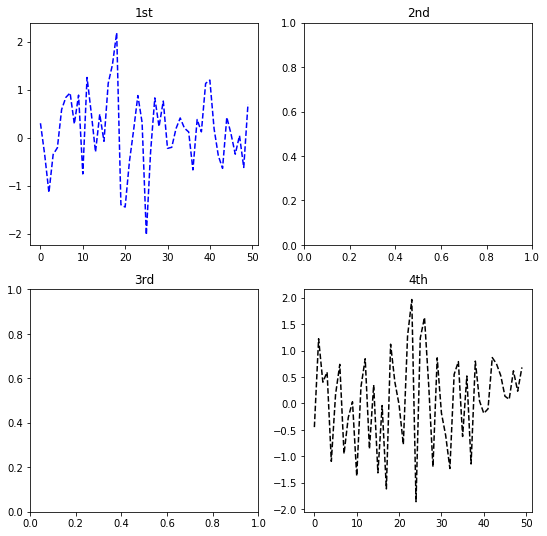

In [62]:
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(2, 2, 1) # 2행 2열 첫번째 그림, 부분 사진 넣기
plt.plot(np.random.randn(50), 'b--') # b는 blue, dashed line type(--)
plt.title('1st')
ax2 = fig.add_subplot(2, 2, 2) # plt.subplot(222) 동일함
plt.title('2nd')
ax3 = fig.add_subplot(2, 2, 3)
plt.title('3rd')
ax4 = fig.add_subplot(2, 2, 4)
plt.plot(np.random.randn(50), 'k--') # k는 black, dashed line type(--)
plt.title('4th')
plt.show()

ValueError: color kwarg must have one color per dataset

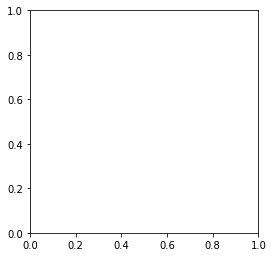

In [73]:
# 다른 방법으로 그리기
fig = plt.figure(figsize = (9, 9)) 
plt.subplot(221)
plt.hist(arr, bins = 20, color = 'b', alpha = 0.3, label = 'arr1')
plt.legend()
plt.subplot(222)
plt.hist(arr, bins = 20, color = 'r', alpha = 0.3, label = 'arr1')
plt.subplot(223)
plt.hist(arr, bins = 20, color = 'b', alpha = 0.3, label = 'arr1')
plt.subplot(224)
plt.hist(arr, bins = 20, color = 'b', alpha = 0.3, label = 'arr1')
plt.show()

Text(0.5,1,'1st')

Text(0.5,1,'2nd')

Text(0.5,1,'3rd')

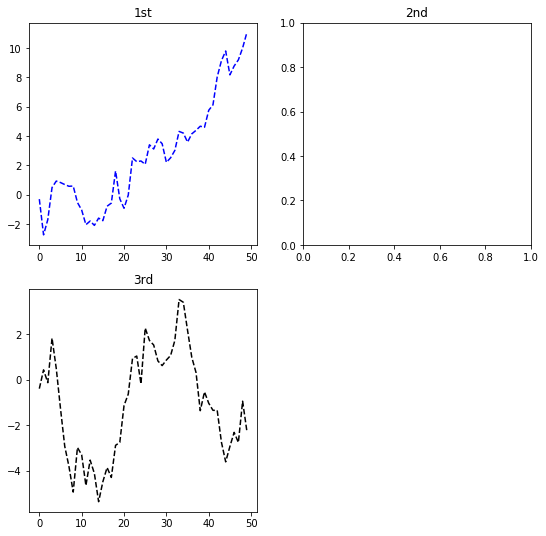

In [63]:
# cumsum으로 그리기
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(2, 2, 1) # 2행 2열 첫번째 그림, 부분 사진 넣기
plt.title('1st')
plt.plot(np.random.randn(50).cumsum(), 'b--') 
ax2 = fig.add_subplot(2, 2, 2) # plt.subplot(222) 동일함
plt.title('2nd')
ax3 = fig.add_subplot(2, 2, 3)
plt.title('3rd')
plt.plot(np.random.randn(50).cumsum(), 'k--') # cumsum 피보나치 수열
plt.show() # 없으면 아무 것도 보이지 않음

(array([1., 1., 0., 0., 0., 4., 5., 7., 4., 5., 3., 4., 2., 3., 3., 2., 0.,
        3., 2., 1.]),
 array([-2.3015387 , -2.08144901, -1.86135931, -1.64126962, -1.42117993,
        -1.20109024, -0.98100055, -0.76091086, -0.54082116, -0.32073147,
        -0.10064178,  0.11944791,  0.3395376 ,  0.55962729,  0.77971699,
         0.99980668,  1.21989637,  1.43998606,  1.66007575,  1.88016544,
         2.10025514]),
 <a list of 20 Patch objects>)

(array([1., 1., 0., 0., 0., 4., 5., 7., 4., 5., 3., 4., 2., 3., 3., 2., 0.,
        3., 2., 1.]),
 array([-1.3015387 , -1.08144901, -0.86135931, -0.64126962, -0.42117993,
        -0.20109024,  0.01899945,  0.23908914,  0.45917884,  0.67926853,
         0.89935822,  1.11944791,  1.3395376 ,  1.55962729,  1.77971699,
         1.99980668,  2.21989637,  2.43998606,  2.66007575,  2.88016544,
         3.10025514]),
 <a list of 20 Patch objects>)

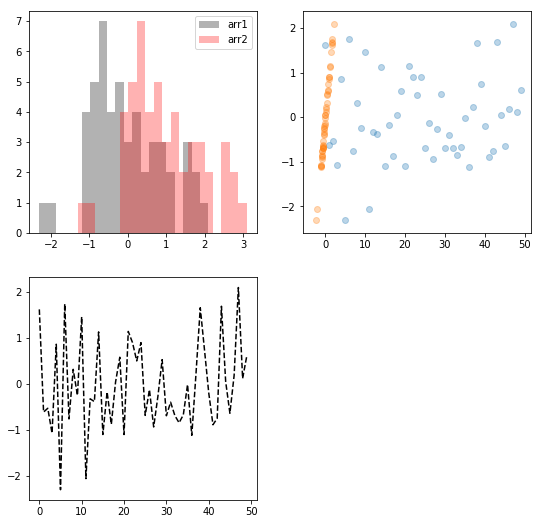

In [76]:
np.random.seed(1)
arr = np.random.randn(50)
arr2 = np.random.randn(51)

fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(arr, 'k--')
ax1.hist(arr, bins=20, color='k', alpha=0.3, label = 'arr1')
# 투명도 조절 alpha -> data point가 뭉쳐있는 경우, 이를 표현할 때 alpha가 낮을 때 잘 표현될 수 있음.
ax1.hist(arr+1,bins=20, color='r', alpha=0.3, label = 'arr2') # 겹쳐 그리기
ax1.legend() # 범례(legend) 표시
ax2.scatter(np.arange(len(arr)), arr, alpha = 0.3)
ax2.scatter(arr, arr, alpha = 0.3)
plt.show()

(array([1., 1., 0., 0., 0., 4., 5., 7., 4., 5., 3., 4., 2., 3., 3., 2., 0.,
        3., 2., 1.]),
 array([-2.3015387 , -2.08144901, -1.86135931, -1.64126962, -1.42117993,
        -1.20109024, -0.98100055, -0.76091086, -0.54082116, -0.32073147,
        -0.10064178,  0.11944791,  0.3395376 ,  0.55962729,  0.77971699,
         0.99980668,  1.21989637,  1.43998606,  1.66007575,  1.88016544,
         2.10025514]),
 <a list of 20 Patch objects>)

(array([1., 1., 0., 0., 0., 4., 5., 7., 4., 5., 3., 4., 2., 3., 3., 2., 0.,
        3., 2., 1.]),
 array([-1.3015387 , -1.08144901, -0.86135931, -0.64126962, -0.42117993,
        -0.20109024,  0.01899945,  0.23908914,  0.45917884,  0.67926853,
         0.89935822,  1.11944791,  1.3395376 ,  1.55962729,  1.77971699,
         1.99980668,  2.21989637,  2.43998606,  2.66007575,  2.88016544,
         3.10025514]),
 <a list of 20 Patch objects>)

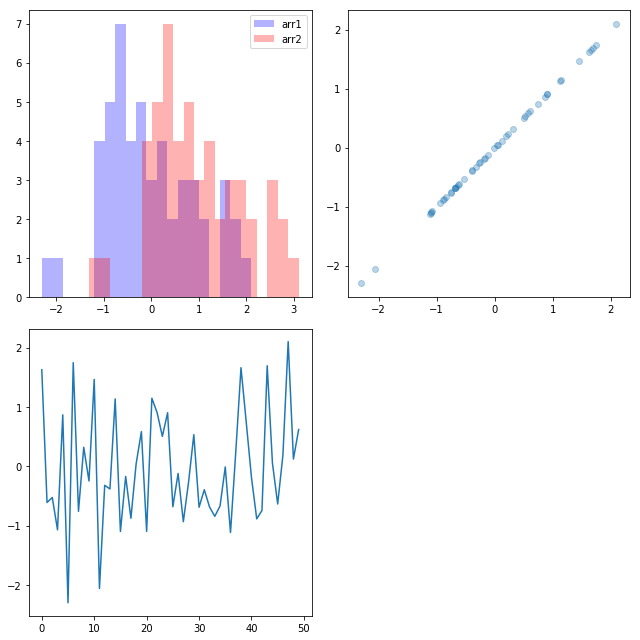

In [77]:
# 하위 그림들의 간격 조절
fig = plt.figure(figsize=(9,9))
plt.subplot(221)
plt.hist(arr, bins=20, color='b', alpha=0.3, label='arr1')
plt.hist(arr+1, bins=20, color='r', alpha=0.3, label='arr2')
plt.legend()

plt.subplot(222)
plt.scatter(arr, arr, alpha=0.3)

plt.subplot(223)
plt.plot(arr)
plt.tight_layout() # 여백 좁게
plt.savefig('fig4.png', dpi=400)
plt.show()

(array([1., 1., 0., 0., 0., 4., 5., 7., 4., 5., 3., 4., 2., 3., 3., 2., 0.,
        3., 2., 1.]),
 array([-2.3015387 , -2.08144901, -1.86135931, -1.64126962, -1.42117993,
        -1.20109024, -0.98100055, -0.76091086, -0.54082116, -0.32073147,
        -0.10064178,  0.11944791,  0.3395376 ,  0.55962729,  0.77971699,
         0.99980668,  1.21989637,  1.43998606,  1.66007575,  1.88016544,
         2.10025514]),
 <a list of 20 Patch objects>)

(array([1., 1., 0., 0., 0., 4., 5., 7., 4., 5., 3., 4., 2., 3., 3., 2., 0.,
        3., 2., 1.]),
 array([-1.3015387 , -1.08144901, -0.86135931, -0.64126962, -0.42117993,
        -0.20109024,  0.01899945,  0.23908914,  0.45917884,  0.67926853,
         0.89935822,  1.11944791,  1.3395376 ,  1.55962729,  1.77971699,
         1.99980668,  2.21989637,  2.43998606,  2.66007575,  2.88016544,
         3.10025514]),
 <a list of 20 Patch objects>)

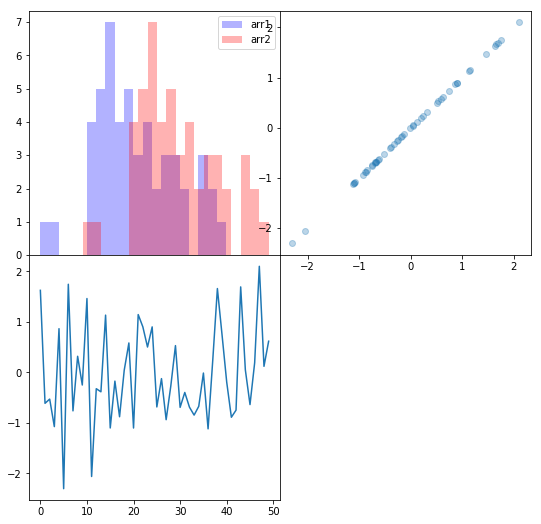

In [78]:
# 하위 그림들의 간격 조절
fig = plt.figure(figsize=(9,9))
plt.subplot(221)
plt.hist(arr, bins=20, color='b', alpha=0.3, label='arr1')
plt.hist(arr+1, bins=20, color='r', alpha=0.3, label='arr2')
plt.legend()

plt.subplot(222)
plt.scatter(arr, arr, alpha=0.3)

plt.subplot(223)
plt.plot(arr)
plt.subplots_adjust(wspace=0, hspace=0) # 딱 붙어서
plt.show()

In [ ]:
# 그림을 파일로 저장
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(arr.cumsum(), 'k--')
ax1.hist(arr, bins=20, color='k', alpha=0.3, label='arr1')
ax2.scatter(arr, arr, alpha=0.3)
plt.savefig('fig1.png', dpi=20)
plt.savefig('fig2.png', dpi=400)
plt.savefig('fig3.png', dpi=400, bbox_inches='tight')
plt.close() # plt.close()를 해야 그림이 쌓이지 않음

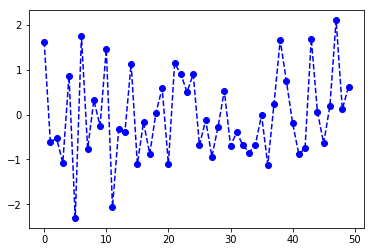

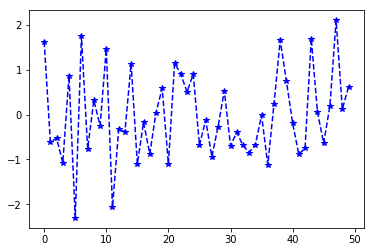

In [79]:
# 색상, 선, 마커
plt.plot(arr[:100], 'bo--') # 색상, 점, 선
plt.show()
plt.plot(arr[:100], 'b*--')
plt.show()

## iris 자료의 시각화

In [80]:
# iris 자료 불러오기
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


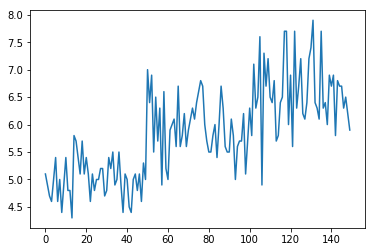

In [81]:
var = 'SepalLengthCm'
iris[var].plot() # 각종 시각화 옵션은 plot() 안에
plt.show()

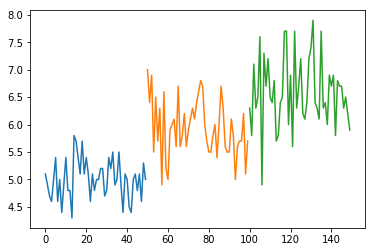

In [82]:
for key, data in iris.groupby('Species'):
    data[var].plot()
plt.show()
# 가로축은 index, 51~100번이 다른 종, 101~150번 다른 종

Text(0.5,1,'Comparison of SepalLengthCm for each species')

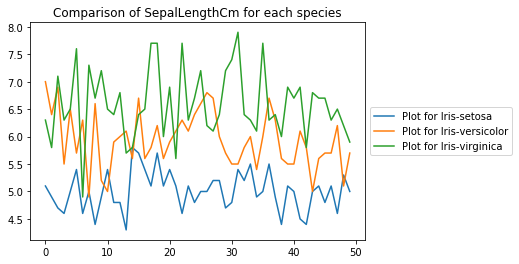

In [84]:
for key, data in iris.groupby('Species'):
    data = data.reset_index() # 데이터 인덱스 리셋
    data[var].plot(label='Plot for ' + key)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.title('Comparison of ' + var + ' for each species') # 문자열 연산의 활용
plt.show()
# 시계열 자료일 때 유용한 code

## seaborn 실습

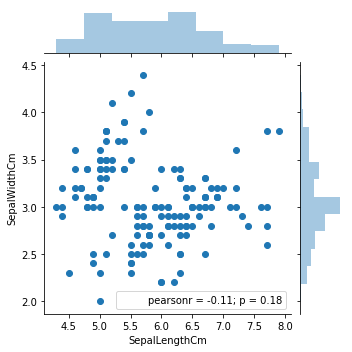

In [86]:
# seaborn 라이브러리 불러오기
import seaborn as sns

sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
plt.show()
# x, y에 대해 히스토그램을 자동으로 출력
# 상관계수 : pearsonr -0.11, 검정 p밸류 0.18

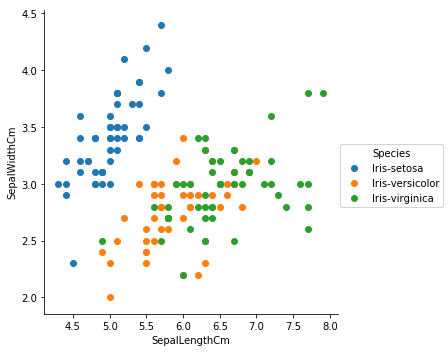

In [89]:
sns.FacetGrid(iris, hue='Species', size=5) .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") .add_legend()
plt.show()
# sns에서는 groupby 대신 hue 사용, map은 function을 쓰겠다는 뜻

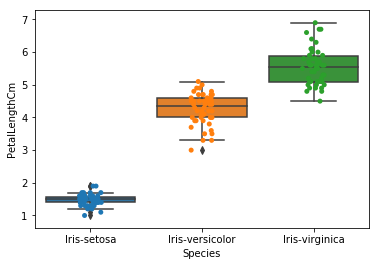

In [91]:
sns.boxplot(x='Species', y="PetalLengthCm", data=iris) # x는 범주형 변수, y는 연속형 변수
sns.stripplot(x='Species', y="PetalLengthCm", data=iris, jitter=True, edgecolor='red') # x는 범주형 변수, y는 연속형 변수
plt.show()
# seaborn 패키지 boxplot에서 특이하게 outlier는 다이아몬드 형태로 찍힘

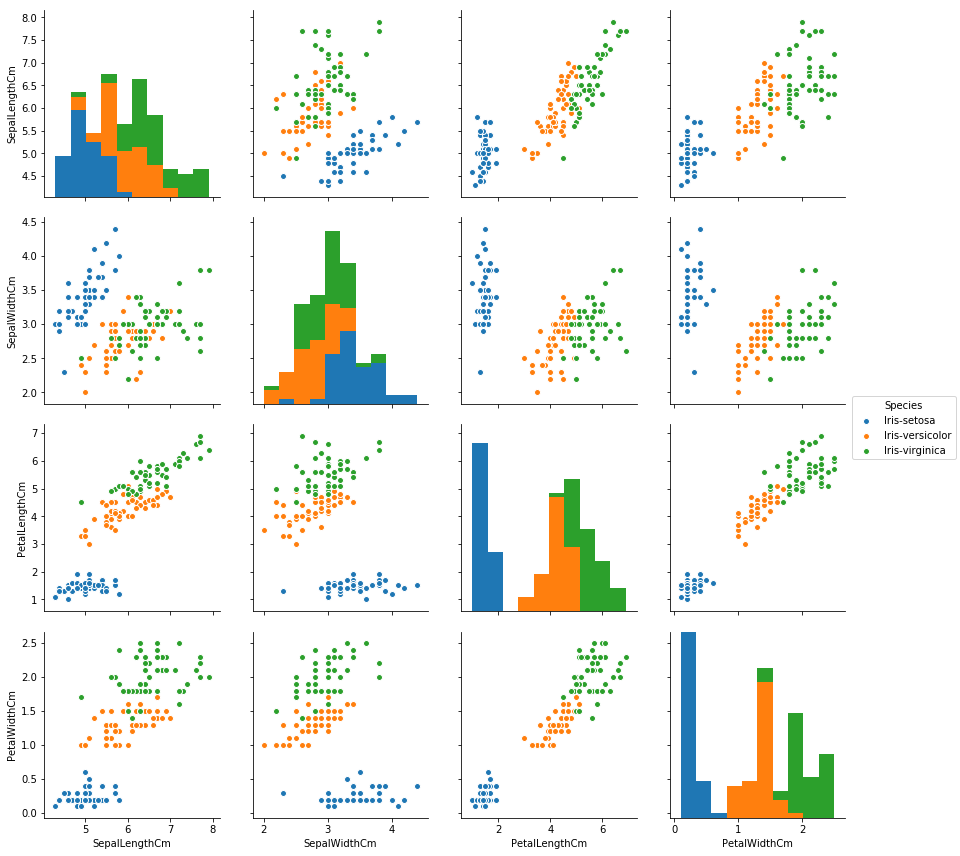

In [95]:
sns.pairplot(iris.drop("Id", axis=1), # drop 시키기
            hue="Species", size=3) # 디폴트 히스토그램
# diag_kind = 'hist' 대각선에 히스토그램 나와라
plt.show()

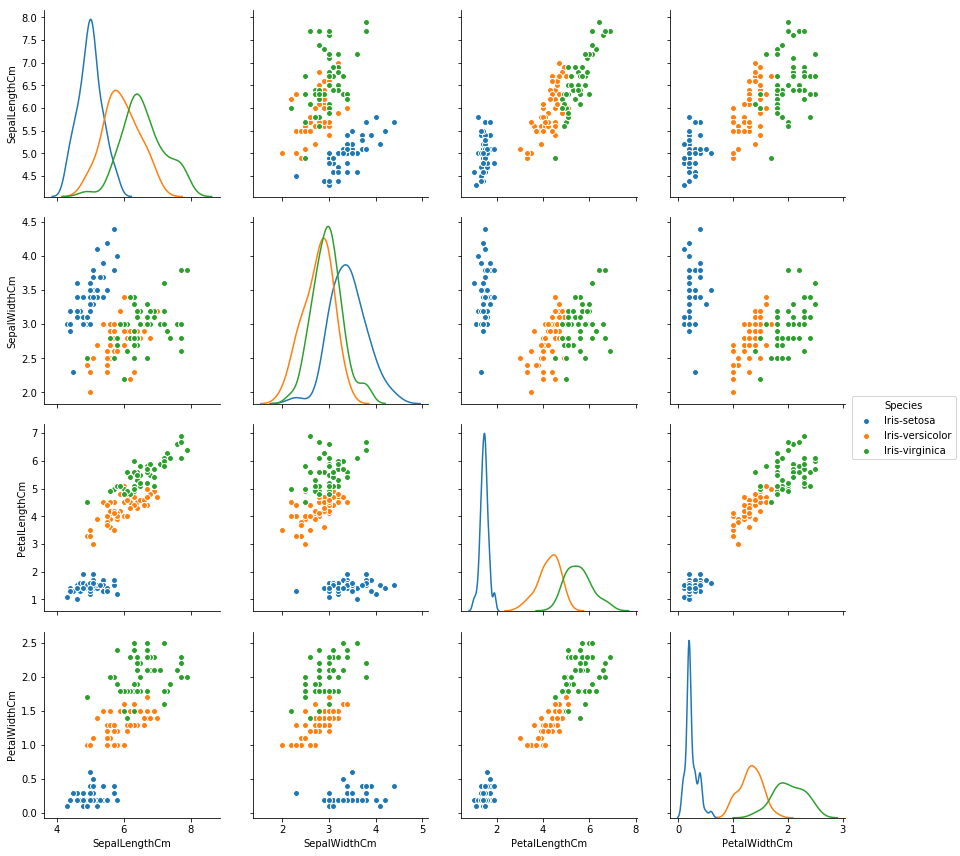

In [96]:
sns.pairplot(iris.drop('Id', axis = 1),
            hue = 'Species', size = 3, diag_kind = 'kde') # kde: 커널밀도추정곡선
# 분석 1 : PetalLengthCm이랑 PetalWidthCm이 강한 선형관계를 가지고 있음
# 분석 2 : Setosa는 PetalLengthCm과 PetalWidth가 굉장히 낮다 -> 이후 종들에 대한 분류 시스템 마련 
plt.show()